<a href="https://colab.research.google.com/github/aruns1316/Data-Cleaning-Model-Fitting-EDA/blob/main/Handling_Missing_Value_in_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Sample dataset with missing values
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", np.nan],
    "Age": [25, np.nan, 30, 35, 28],
    "Salary": [50000, 60000, np.nan, 80000, 55000],
    "City": ["New York", "Los Angeles", "Chicago", np.nan, "Houston"]
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)


Original Dataset:
      Name   Age   Salary         City
0    Alice  25.0  50000.0     New York
1      Bob   NaN  60000.0  Los Angeles
2  Charlie  30.0      NaN      Chicago
3    David  35.0  80000.0          NaN
4      NaN  28.0  55000.0      Houston


In [ ]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Name      1
Age       1
Salary    1
City      1
dtype: int64


In [ ]:
# Drop rows with any missing values
df_dropped = df.dropna()
print("\nDataset After Dropping Rows with Missing Values:")
print(df_dropped)


Dataset After Dropping Rows with Missing Values:
    Name   Age   Salary      City
0  Alice  25.0  50000.0  New York


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
print("\nDataset After Imputing Age with Mean:")
print(df)


Dataset After Imputing Age with Mean:
      Name   Age   Salary         City
0    Alice  25.0  50000.0     New York
1      Bob  29.5  60000.0  Los Angeles
2  Charlie  30.0      NaN      Chicago
3    David  35.0  80000.0          NaN
4      NaN  28.0  55000.0      Houston


<ipython-input-4-1a661be60813>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
data

{'Name': ['Alice', 'Bob', 'Charlie', 'David', nan],
 'Age': [25, nan, 30, 35, 28],
 'Salary': [50000, 60000, nan, 80000, 55000],
 'City': ['New York', 'Los Angeles', 'Chicago', nan, 'Houston']}

In [ ]:
df['Salary'].fillna(df['Salary'].median(), inplace=True)

<ipython-input-6-6eacf89031ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(), inplace=True)


In [ ]:
print(df)

      Name   Age   Salary         City
0    Alice  25.0  50000.0     New York
1      Bob  29.5  60000.0  Los Angeles
2  Charlie  30.0  57500.0      Chicago
3    David  35.0  80000.0          NaN
4      NaN  28.0  55000.0      Houston


In [ ]:
df['City'].fillna(df['City'].mode()[0], inplace=True)
print("\nDataset After Imputing City with Mode:")


Dataset After Imputing City with Mode:


<ipython-input-8-9b980983c174>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].fillna(df['City'].mode()[0], inplace=True)


In [ ]:
print(df)

      Name   Age   Salary         City
0    Alice  25.0  50000.0     New York
1      Bob  29.5  60000.0  Los Angeles
2  Charlie  30.0  57500.0      Chicago
3    David  35.0  80000.0      Chicago
4      NaN  28.0  55000.0      Houston


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Predict missing Salary
# Step 1: Split data into training and missing datasets
train_data = df[df['Salary'].notnull()]
missing_data = df[df['Salary'].isnull()]

In [ ]:
X_train = train_data[['Age']]  # Features
y_train = train_data['Salary']  # Target

In [ ]:
X_missing = missing_data[['Age']]

In [ ]:
# Step 2: Train the model
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Check if there are missing values in the 'Salary' column
if df['Salary'].isnull().sum() > 0:
    # Step 1: Split data into training and missing datasets
    train_data = df[df['Salary'].notnull()]
    missing_data = df[df['Salary'].isnull()]

In [ ]:
train_data

,Name,Age,Salary,City
0,Alice,25.0,50000.0,New York
1,Bob,29.5,60000.0,Los Angeles
2,Charlie,30.0,57500.0,Chicago
3,David,35.0,80000.0,Chicago
4,NaN,28.0,55000.0,Houston


<ipython-input-24-f20a2a65f7cf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='Age', y='City', inner='stick', palette='Dark2')


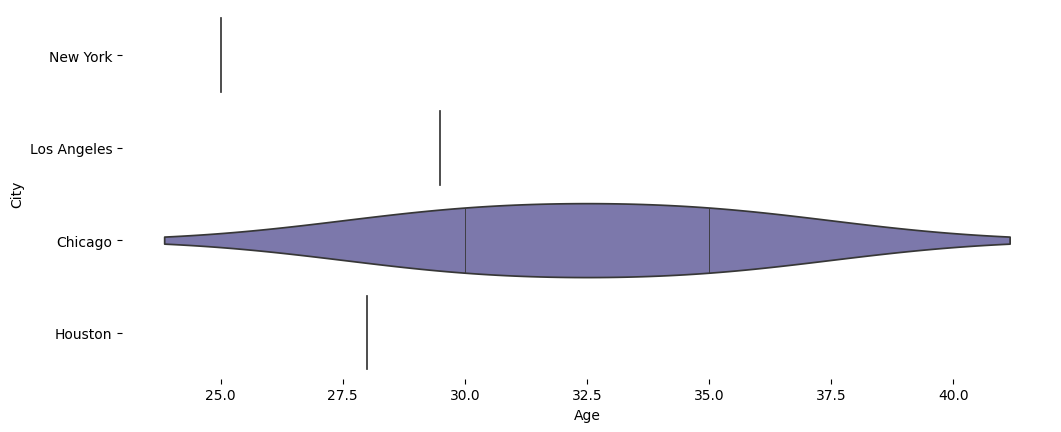

In [ ]:
# @title City vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_data['City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='Age', y='City', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

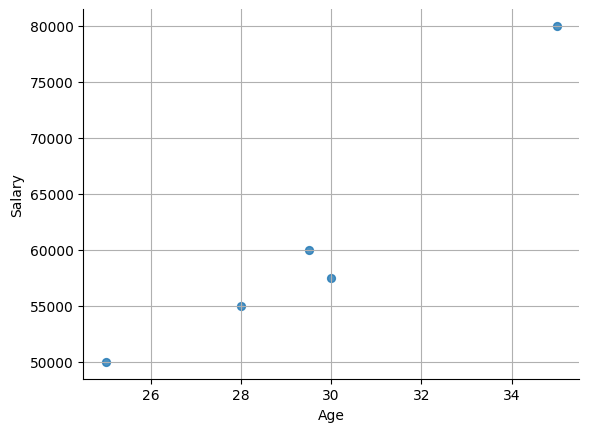

In [ ]:
# @title Age vs Salary

from matplotlib import pyplot as plt
train_data.plot(kind='scatter', x='Age', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid()

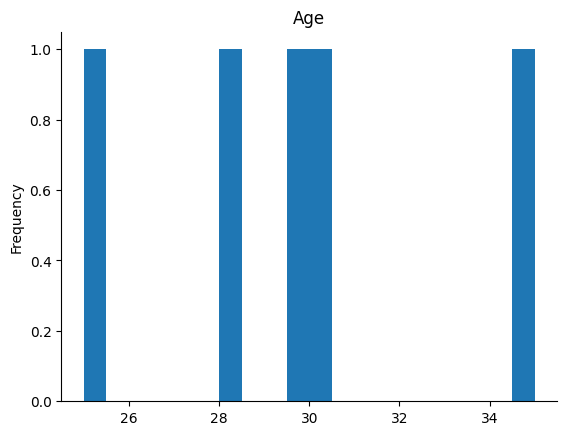

In [ ]:
# @title Age

from matplotlib import pyplot as plt
train_data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
if not missing_data['Age'].isnull().all():
    pass # Added a placeholder, replace with your intended code

In [ ]:
X_missing = missing_data[['Age']].dropna()  # Use non-missing Age for prediction

In [ ]:
X_missing

,Age


In [ ]:
data

{'Name': ['Alice', 'Bob', 'Charlie', 'David', nan],
 'Age': [25, nan, 30, 35, 28],
 'Salary': [50000, 60000, nan, 80000, 55000],
 'City': ['New York', 'Los Angeles', 'Chicago', nan, 'Houston']}